**Extracting Dataset using Kaggle API**

In [1]:
#installing the Kaggle library
!pip install kaggle

In [2]:
#Configuiring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset

In [3]:
#Kaggle API
!kaggle competitions download -c dogs-vs-cats

 99% 806M/812M [00:06<00:00, 92.1MB/s]
100% 812M/812M [00:07<00:00, 121MB/s] 


In [4]:
#Extracting the Dog vs Cat compressed dataset
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()

In [5]:
#Extracting the Train.zip
from zipfile import ZipFile
dataset = '/content/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()

In [6]:
import os
#Counting the number of images in train folder
path,dirs,files = next(os.walk('/content/train'))
file_count = len(files)
print(f"There's {file_count} of files/images")

There's 25000 of files/images


In [7]:
#Printing the name of the Images
file_names = os.listdir('/content/train')
print(file_names)

['dog.7042.jpg', 'cat.9033.jpg', 'dog.6505.jpg', 'cat.2882.jpg', 'cat.5012.jpg', 'dog.6181.jpg', 'cat.9094.jpg', 'cat.11186.jpg', 'cat.2584.jpg', 'cat.10476.jpg', 'cat.4877.jpg', 'dog.1963.jpg', 'cat.6829.jpg', 'dog.10907.jpg', 'cat.9058.jpg', 'cat.10287.jpg', 'cat.7143.jpg', 'dog.4769.jpg', 'cat.6837.jpg', 'cat.8986.jpg', 'dog.11436.jpg', 'dog.9312.jpg', 'dog.11268.jpg', 'cat.3896.jpg', 'cat.5910.jpg', 'dog.9496.jpg', 'dog.549.jpg', 'cat.4482.jpg', 'cat.4545.jpg', 'cat.3188.jpg', 'cat.2806.jpg', 'cat.1135.jpg', 'dog.1672.jpg', 'cat.10114.jpg', 'dog.7657.jpg', 'dog.3942.jpg', 'cat.1632.jpg', 'dog.7297.jpg', 'dog.7158.jpg', 'dog.3845.jpg', 'cat.211.jpg', 'cat.4366.jpg', 'dog.6112.jpg', 'cat.1885.jpg', 'cat.3111.jpg', 'dog.1849.jpg', 'dog.5958.jpg', 'dog.4151.jpg', 'dog.6126.jpg', 'dog.2929.jpg', 'dog.11565.jpg', 'cat.6787.jpg', 'dog.10343.jpg', 'dog.7267.jpg', 'dog.8804.jpg', 'dog.1638.jpg', 'dog.5309.jpg', 'dog.3153.jpg', 'cat.7864.jpg', 'dog.5211.jpg', 'cat.8204.jpg', 'dog.2941.jpg', 

Importing the dependecies

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the image of Dogs and Cats

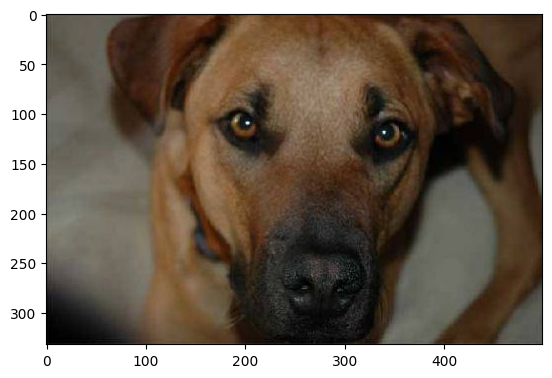

In [9]:
#Display the image of a Dog
dog_img = mpimg.imread('/content/train/dog.5028.jpg')
plt.imshow(dog_img)

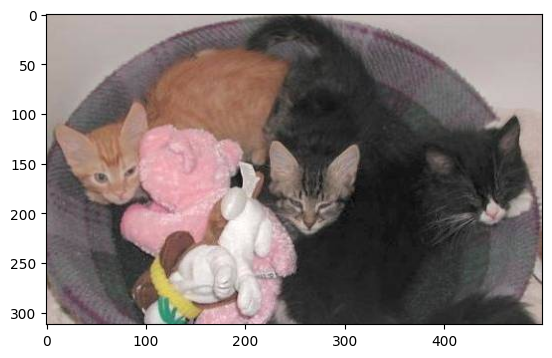

In [10]:
#Display the image of a Cat
cat_img = mpimg.imread('/content/train/cat.1429.jpg')
plt.imshow(cat_img)

Counting the number of dogs and cats images

In [11]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for i in range(len(file_names)):
  name = file_names[i]
  if name[0] == 'd':
    dog_count += 1
  else:
    cat_count += 1

print('The number of dog images =',dog_count)
print('The number of cat images =',cat_count)

The number of dog images = 12500
The number of cat images = 12500


Resizing an saving the images in new directory

In [12]:
#Creating a directory for resized images
os.mkdir('/content/image resized')

In [13]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder + filename
  img.save(newImgPath)

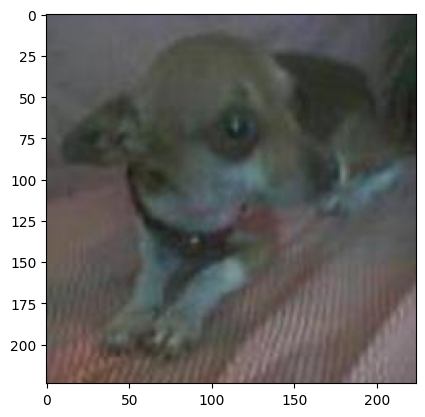

In [14]:
#Display the resized dog image
dog_img = mpimg.imread('/content/image resized/dog.7042.jpg')
plt.imshow(dog_img)

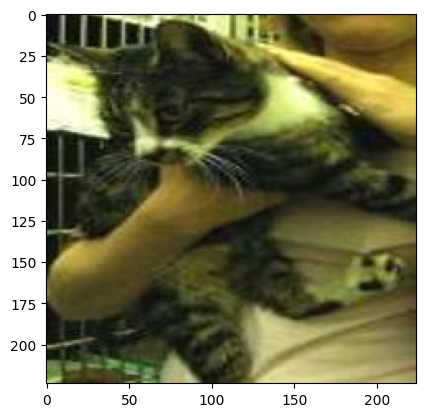

In [15]:
#Display the resized cat image
cat_img = mpimg.imread('/content/image resized/cat.9033.jpg')
plt.imshow(cat_img)

**Creating labels for resized dog and cats images**
(Cat --> 0
Dog --> 1)

In [16]:
#Creating a for loop to assign values to images
filename = os.listdir('/content/image resized/')
labels = []

for i in range(2000):
  if filename[i][0] == 'd':
    labels.append(1)
  else:
    labels.append(0)

In [17]:
print(len(filename))
print(filename[0:20])
print(len(labels))
print(labels[0:20])

2000
['dog.7042.jpg', 'cat.9033.jpg', 'dog.6505.jpg', 'cat.2882.jpg', 'cat.5012.jpg', 'dog.6181.jpg', 'cat.9094.jpg', 'cat.11186.jpg', 'cat.2584.jpg', 'cat.10476.jpg', 'cat.4877.jpg', 'dog.1963.jpg', 'cat.6829.jpg', 'dog.10907.jpg', 'cat.9058.jpg', 'cat.10287.jpg', 'cat.7143.jpg', 'dog.4769.jpg', 'cat.6837.jpg', 'cat.8986.jpg']
2000
[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0]


In [18]:
#Counting the total number of cat's and dog's images in the resized images
values, counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[ 949 1051]


Converting all the resized images to numpy arrays

In [19]:
#Importing libs
import cv2
import glob

In [20]:
image_directory = '/content/image resized/'
image_extension = ['png','jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [21]:
print(type(dog_cat_images))
print(dog_cat_images)

<class 'numpy.ndarray'>
[[[[102  92  92]
   [102  92  92]
   [102  92  92]
   ...
   [ 52  56  45]
   [ 51  55  43]
   [ 51  55  43]]

  [[102  92  92]
   [102  92  92]
   [103  93  93]
   ...
   [ 51  55  44]
   [ 51  55  43]
   [ 50  54  42]]

  [[102  92  92]
   [103  93  93]
   [103  93  93]
   ...
   [ 50  54  43]
   [ 50  54  42]
   [ 49  53  41]]

  ...

  [[ 68  74 103]
   [ 74  80 109]
   [ 81  86 117]
   ...
   [110 106 118]
   [110 106 118]
   [110 106 118]]

  [[ 70  76 105]
   [ 76  82 111]
   [ 82  87 118]
   ...
   [108 104 116]
   [108 104 116]
   [108 104 116]]

  [[ 73  79 108]
   [ 78  84 113]
   [ 83  88 119]
   ...
   [107 103 115]
   [106 102 114]
   [107 103 115]]]


 [[[ 19  22  20]
   [ 21  24  22]
   [ 17  20  18]
   ...
   [ 25 102 128]
   [ 27 103 126]
   [ 27 103 126]]

  [[ 20  23  21]
   [ 21  24  22]
   [ 17  20  18]
   ...
   [ 29 106 132]
   [ 32 108 131]
   [ 32 108 131]]

  [[ 22  23  21]
   [ 22  23  21]
   [ 18  19  17]
   ...
   [ 34 112 135]
   [

In [22]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [24]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> Training Data

400 --> Test Data

In [25]:
# Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [26]:
print(X_train_scaled)

[[[[0.10196078 0.25882353 0.46666667]
   [0.10196078 0.25882353 0.45098039]
   [0.0745098  0.20392157 0.38431373]
   ...
   [0.34509804 0.41960784 0.40784314]
   [0.35294118 0.41568627 0.41176471]
   [0.38039216 0.44313725 0.43921569]]

  [[0.1254902  0.28235294 0.49019608]
   [0.1254902  0.27843137 0.48235294]
   [0.08235294 0.21568627 0.39607843]
   ...
   [0.34509804 0.41568627 0.41176471]
   [0.36470588 0.42745098 0.42352941]
   [0.38823529 0.45098039 0.44705882]]

  [[0.13333333 0.29411765 0.50980392]
   [0.14117647 0.29803922 0.50588235]
   [0.08627451 0.22745098 0.41568627]
   ...
   [0.3372549  0.40784314 0.41176471]
   [0.36862745 0.42745098 0.43529412]
   [0.40392157 0.45490196 0.4627451 ]]

  ...

  [[0.42745098 0.37254902 0.34901961]
   [0.41568627 0.36078431 0.3372549 ]
   [0.44313725 0.38823529 0.36470588]
   ...
   [0.58431373 0.54901961 0.51372549]
   [0.54117647 0.50588235 0.47058824]
   [0.51764706 0.48235294 0.44705882]]

  [[0.40392157 0.34901961 0.3254902 ]
   [0.4

**Building the Neural Network**

In [27]:
!pip install --upgrade tensorflow tensorflow-hub
!pip install tensorflow
import tf_keras
import tensorflow as tf
import tensorflow_hub as hub

In [28]:
# URL for the MobileNetV2 feature vector from TensorFlow Hub
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

# Load the pretrained model from TensorFlow Hub as a KerasLayer
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [29]:
num_of_classes = 2

# Define the Sequential model
model = tf_keras.Sequential([
    pretrained_model,
    tf_keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [32]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [33]:
# Train the model
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 66s 1s/step - loss: 0.1890 - acc: 0.9250
Epoch 2/5
50/50 [==============================] - 60s 1s/step - loss: 0.0638 - acc: 0.9781
Epoch 3/5
50/50 [==============================] - 62s 1s/step - loss: 0.0451 - acc: 0.9850
Epoch 4/5
50/50 [==============================] - 63s 1s/step - loss: 0.0338 - acc: 0.9906
Epoch 5/5
50/50 [==============================] - 69s 1s/step - loss: 0.0280 - acc: 0.9912


In [35]:
# Evaluating the test data on the model
score, acc = model.evaluate(X_test_scaled,Y_test)
print('Test loss:',score)
print('Test accuracy:',acc)

13/13 [==============================] - 34s 2s/step - loss: 0.0803 - acc: 0.9775
Test loss: 0.08031787723302841
Test accuracy: 0.9775000214576721


**Predictive System**

Enter the path of the image to be predicted: /content/cat2.jpg


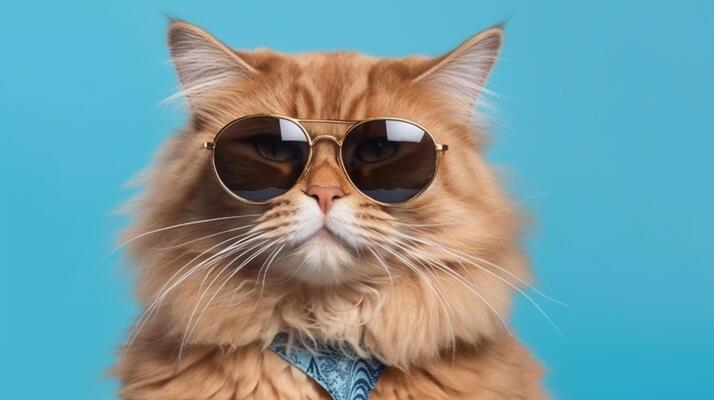

1/1 [==============================] - 0s 55ms/step
[[ 3.9772496 -3.13159  ]]
0
The image is of a cat


In [45]:
input_iamge_path = input('Enter the path of the image to be predicted: ')

input_image = cv2.imread(input_iamge_path)
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('The image is of a cat')
else:
  print('The image is of a dog')